,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


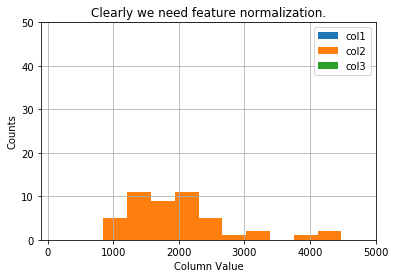

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "ex1data2.txt"
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
#cols = np.loadtxt('ex1data2.txt', delimiter=",", usecols=(0,1,2), unpack=True); #Read in comma separated data


cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X.insert(0, "Eins", 1)


X = np.matrix(X.values) #otherwise X[:,0] and stuff not working ...not hashable
y = np.matrix(y.values)
m = y.size

#PLOT
plt.grid()
plt.xlim([-100,5000])
plt.ylim([0,50])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()
data.head()

       Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389


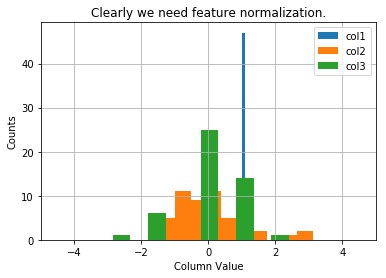

In [4]:

#normalize FEATURES
dataN = (data - data.mean()) / data.std()
print (dataN.head())


colCount = dataN.shape[1]
#Again reassign
X = dataN.iloc[:,0:colCount-1]
y = dataN.iloc[:,colCount-1:colCount]
X.insert(0, "Eins", 1)
X = np.matrix(X.values)
y = np.matrix(y.values)


plt.grid()
plt.xlim([-5,5])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [7]:
initial_theta = np.zeros((X.shape[1],1))
test = np.zeros((X.shape[1],1))

print(initial_theta)
print (test)

[[ 0.]
 [ 0.]
 [ 0.]]
[[ 0.]
 [ 0.]
 [ 0.]]


In [30]:
#GradientDescent
theta = np.matrix(np.array([0, 0, 0]))
print (theta)
def calcCost(X, y, w):
    guess = X.dot(w)
    errors = np.subtract(guess,y)
    sqrErrors = np.square(errors)
    errorSum = np.sum(sqrErrors)
    J = errorSum / y.size 
    #1/2m in example bc Ng uses half-squared error without explaining jack. Value doesn't matter, just the direction
    return J

# print (np.transpose([[0], [0], [0]]))
# print(calcCost(X,y,theta.T))
#print (X.dot(theta.T) -y )
# print (X.T.dot(X.dot(theta.T) -y))
# print (X.T)

print (X * (theta.T))

def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))


def gradientDescent2(X, y, alpha=0.01, iters=1000, theta=[0,0,0]):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost


def gradientDescent (X, y, alpha=0.01, iters=1000, w=[[0],[0]]):
    m = y.size
    Jhistory = np.zeros(iters)
    thetaHis = []
    for i in np.arange(iters): 
        h = X.dot(w)
        w = w - alpha*(1/m) * (X.T.dot(h-y)) #1/m and X.T.dot are part of the derivative (X.T.dot --> for loop with *x(i))
        thetaHis.append(w);
        Jhistory[i] = calcCost(X,y,w)    
    return (w, Jhistory, thetaHis)


[[0 0 0]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[ -1.11134506e-16]
 [  8.78503652e-01]
 [ -4.69166570e-02]]


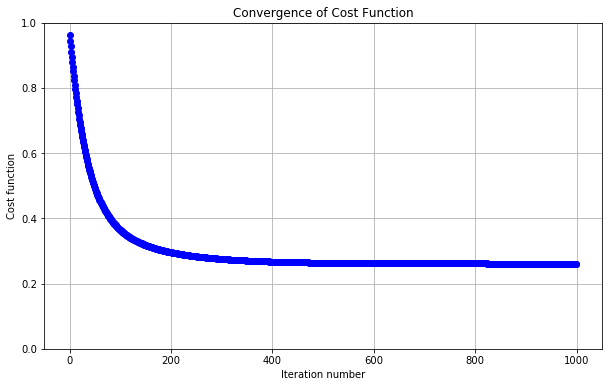

In [23]:
thet, Jhis, thetHis = gradientDescent(X,y, 0.01, 1000, theta.T)
print (X.dot(theta.T))
#Plot the convergence of the cost function
def plotConvergence(history):
    iterations = 1000
    plt.figure(figsize=(10,6))
    plt.plot(range(len(history)),history,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations]) 
    #dummy = plt.ylim([4,8])

#something wrong here
print (thet) #looks wrong.values
plotConvergence(Jhis)
dummy = plt.ylim([0,1])